# First look at the data

In [1]:
import pandas as pd
data = pd.read_csv('../freemont.csv', index_col='Date', parse_dates=True)
%matplotlib inline

- import matplotlib.pyplot to change style of plots

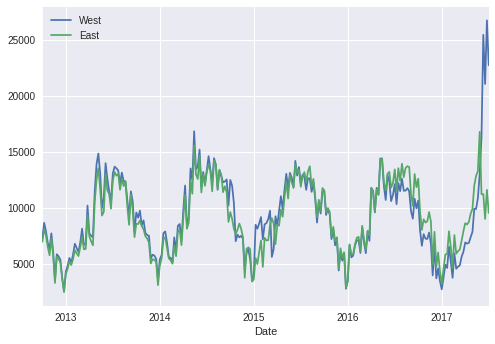

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['West','East']
data.resample('W').sum().plot()

- change the plot to show a daily sum instead of weekly sum
- rolling: use a window 365 units-wide (days here, given the order of commands), and sum data in it (ie each point is the sum of the 365 previous days's data). One can see annual trend this way.

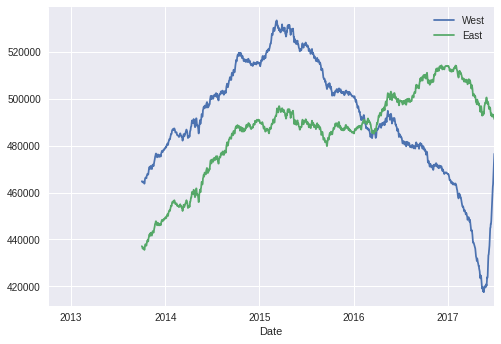

In [3]:
data.resample('D').sum().rolling(365).sum().plot()

- reformat axis

(0, 539148.30000000005)

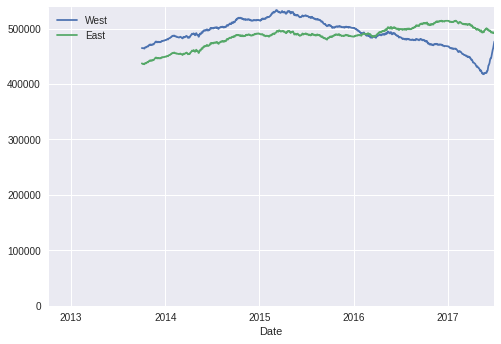

In [4]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

- insert a data column made of the sum of data

(0, 1059460.05)

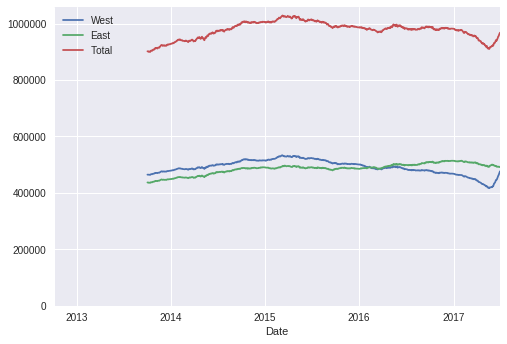

In [5]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

- look at the trend on the individual days (group data by the time of the day, then average it). Note that you have to use 'time' member function to get the time of the day from the index, as the index itself is a full date.

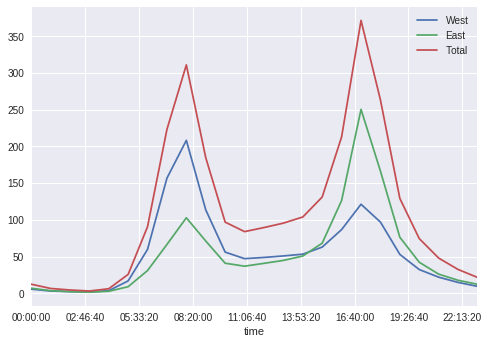

In [6]:
data.groupby(data.index.time).mean().plot()

In [7]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


- plot this by deactivating the legend and setting a very high transparency (as there is one plot per column, that's to say one plot per day here!)
- on this plot, one can see 2 trends of flux on the bridge. One probably corresponds to weekdays, and the other to weekends and holidays

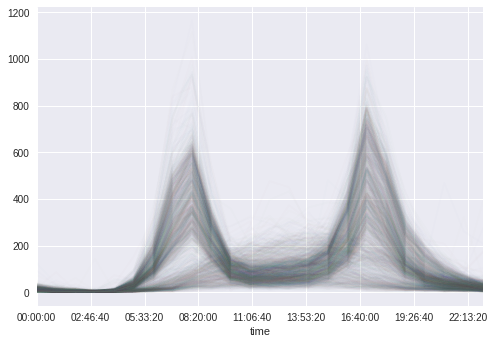

In [8]:
pivoted.plot(legend=False, alpha=0.01)